# IMPORTING LIBRARIES 

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# IMPORTING DATASET

In [2]:
dataset = pd.read_csv("TwitterHate.csv")

In [3]:
dataset.shape

(31962, 3)

In [4]:
dataset.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


<AxesSubplot:>

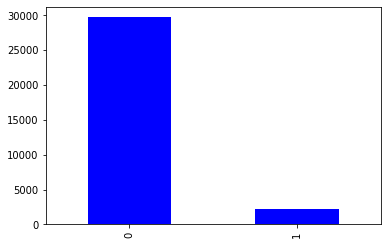

In [5]:
dataset['label'].value_counts().plot.bar(color = 'blue', figsize = (6, 4))

In [ ]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', dataset['tweet'][i])
  review = review.lower()
  review = re.sub(r'\@\w+|\#','', review)
  review = re.sub(r"http\S+|www\S+|https\S+", '', review, flags=re.MULTILINE)
  review = re.sub(r'^[RT]+','',review) #replace RT-tags
  review = re.sub(r'^[amp]+','',review) #replace amp-tags
  review = re.sub(r'\b\w{1,1}\b', '', review)
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [ ]:
tweetstr = str(train_corpus)
twttokens = word_tokenize(tweetstr) 

In [33]:
# Use the counter and find the 10 most common terms.
from collections import Counter 
Counter = Counter(twttokens)
most_occur = Counter.most_common(10)
print(most_occur)

[("'", 32029), (',', 31961), ('user', 9833), ("'user", 7750), ('love', 2845), ('day', 2751), ('amp', 1728), ('happi', 1387), ('like', 1195), ('time', 1173)]


In [34]:
# creating bag of words

from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_features = 2500)
x = tf.fit_transform(train_corpus).toarray()
y = dataset.iloc[:, 1]

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [35]:
# splitting the training data into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9565725251345376
Validation Accuracy : 0.9524465023151045
f1 score : 0.5103092783505154
[[7413   19]
 [ 361  198]]
